### Run sampling only for $\phi$ while keeping $\sigma^2$ and $\tau^2$ fixed.

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp, scipy, gc
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from SVM import *

gc.enable()

In [2]:
phi = 0.3
sigma2 = 1
tau2 = 0.5
theta = (phi, sigma2, tau2)

T = 250
X, Y = simulate_data(theta, T)

### Can bootstrap PF track?

In [3]:
n_particles = 500
logNC, particles = bootstrap_PF_track(n_particles, theta, Y)

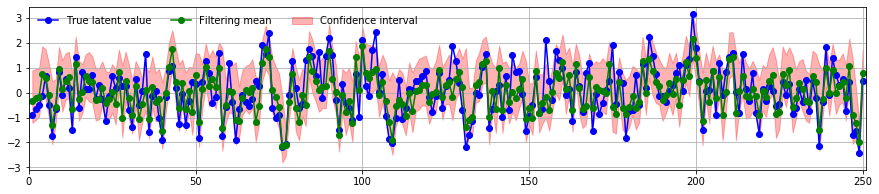

In [4]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.plot(np.arange(1,T+1), X, "bo-", label="True latent value")
plt.fill_between(np.arange(1,T+1), np.percentile(particles,axis=1,q=5), 
                 np.percentile(particles,axis=1,q=95), color='red', alpha=.3, label="Confidence interval")
plt.plot(np.arange(1,T+1), np.mean(particles,1), "go-", label="Filtering mean")
# plt.plot(np.arange(1,T+1), Y, "co-", label="Observed value")
plt.grid(True)
plt.xlim(0,T+1)
plt.legend(ncol=4, frameon=False)

### Plot likelihoods:

In [5]:
K = 100
n_particles = 1000
phi_grid = np.linspace(-0.95,0.95,K)
sigma2_grid = np.exp(np.linspace(-2.5,2.5,K))
tau2_grid = np.exp(np.linspace(-2.5,2.5,K))
ll_grid = np.zeros((K,3))
for i in range(K) :
    ll_grid[i,0] = bootstrap_PF_track(n_particles, np.asarray([phi_grid[i], sigma2, tau2]), Y)[0]
    ll_grid[i,1] = bootstrap_PF_track(n_particles, np.asarray([phi, sigma2_grid[i], tau2]), Y)[0]
    ll_grid[i,2] = bootstrap_PF_track(n_particles, np.asarray([phi, sigma2, tau2_grid[i]]), Y)[0]

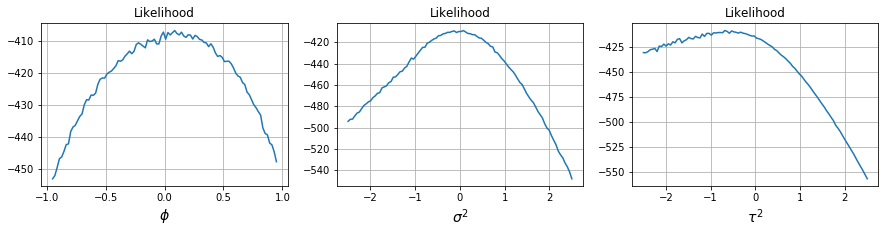

In [6]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.subplot(131)
plt.plot(phi_grid, ll_grid[:,0])
plt.grid(True)
plt.title("Likelihood")
plt.xlabel(r"$\phi$", fontsize=14)
plt.subplot(132)
plt.plot(np.log(sigma2_grid), ll_grid[:,1])
plt.grid(True)
plt.title("Likelihood")
plt.xlabel(r"$\sigma^2$", fontsize=14)
plt.subplot(133)
plt.plot(np.log(tau2_grid), ll_grid[:,2])
plt.grid(True)
plt.title("Likelihood")
plt.xlabel(r"$\tau^2$", fontsize=14);

### MCMC for $\phi$:

In [35]:
n_particles = 2*T 
n_mcmc = 10_000
sc = 0.5
plt.rcParams['figure.figsize'] = (5, 3)

In [ ]:
powers = [1,5,10]
phi_chain = np.zeros((len(powers),n_mcmc+1))
scales = np.zeros((len(powers),n_mcmc+1))

for (i, power) in enumerate(powers) :
    scale = sc/np.sqrt(power)
    phi_chain[i], scales[i] = pMCMC_phi(Y, theta, n_particles, n_mcmc, scale, power=power)

 47%|████▋     | 4682/10000 [19:08<23:14,  3.81it/s]

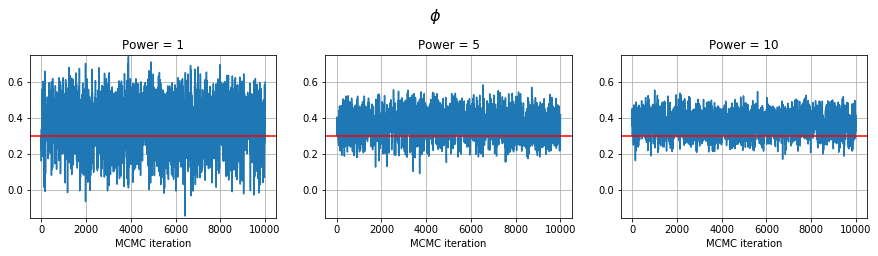

In [42]:
plt.rcParams['figure.figsize'] = (15, 3)
for (i,power) in enumerate(powers) :
    plt.subplot(1,len(powers),i+1)
    plt.plot(np.arange(1+n_mcmc), phi_chain[i])
    plt.axhline(y=phi, color="red")
    plt.grid(True)
    plt.ylim(np.min(phi_chain)-1e-2,np.max(phi_chain)+1e-2)
    plt.title("Power = " + str(power))
    plt.xlabel("MCMC iteration")
plt.suptitle(r"$\phi$", y=1.1, fontsize=16);

In [39]:
print(np.mean(phi_chain,1))
print(np.var(phi_chain,1))

[0.35597281 0.36322414 0.36375042]
[0.01647282 0.00497162 0.00350948]


In [40]:
(np.var(phi_chain,1)[0])/(np.var(phi_chain,1)[1:])

array([3.31337207, 4.69380255])

In [29]:
print(np.round([np.mean(phi_chain_p1), np.mean(phi_chain_p5), np.mean(phi_chain_p10)],2))
print(np.round([np.var(phi_chain_p1)/np.var(phi_chain_p5), 
      np.var(phi_chain_p1)/np.var(phi_chain_p10)],1))

[0.18 0.17 0.19]
[2.9 4.4]


### MCMC for $\sigma^2$:

In [15]:
n_particles = 2*T 
n_mcmc = 10_000
sc = 0.7
plt.rcParams['figure.figsize'] = (5, 3)

100%|██████████| 10000/10000 [26:35<00:00,  6.27it/s]


30.45 % acceptance rate


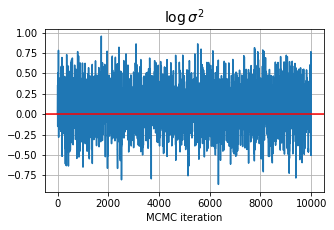

In [16]:
power = 1
scale = sc/np.sqrt(power)
log_sigma2_chain_p1, scales_p1 = pMCMC_sigma2(Y, theta, n_particles, n_mcmc, scale, power=power)

plt.plot(np.arange(1+n_mcmc), log_sigma2_chain_p1)
plt.axhline(y=np.log(sigma2), color="red")
plt.grid(True)
plt.title(r"$\log \, \sigma^2$", fontsize=14)
plt.xlabel("MCMC iteration");

100%|██████████| 10000/10000 [33:18<00:00,  4.72it/s]

28.52 % acceptance rate


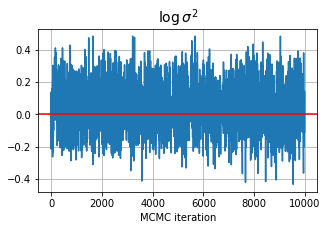

In [17]:
power = 5
scale = sc/np.sqrt(power)
log_sigma2_chain_p5, scales_p5 = pMCMC_sigma2(Y, theta, n_particles, n_mcmc, scale, power=power)

plt.plot(np.arange(1+n_mcmc), log_sigma2_chain_p5)
plt.axhline(y=np.log(sigma2), color="red")
plt.grid(True)
plt.title(r"$\log \, \sigma^2$", fontsize=14)
plt.xlabel("MCMC iteration");

100%|██████████| 10000/10000 [49:56<00:00,  3.81it/s]


27.28 % acceptance rate


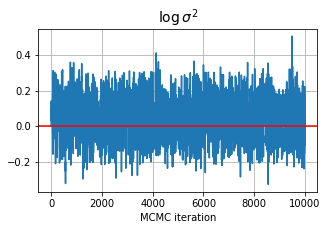

In [18]:
power = 10
scale = sc/np.sqrt(power)
log_sigma2_chain_p10, scales_p10 = pMCMC_sigma2(Y, theta, n_particles, n_mcmc, scale, power=power)

plt.plot(np.arange(1+n_mcmc), log_sigma2_chain_p10)
plt.axhline(y=np.log(sigma2), color="red")
plt.grid(True)
plt.title(r"$\log \, \sigma^2$", fontsize=14)
plt.xlabel("MCMC iteration");

In [35]:
print(np.round([np.mean(np.exp(log_sigma2_chain_p1)), 
                np.mean(np.exp(log_sigma2_chain_p5)), 
                np.mean(np.exp(log_sigma2_chain_p10))],2))
print(np.round([np.var(log_sigma2_chain_p1)/np.var(log_sigma2_chain_p5), 
       np.var(log_sigma2_chain_p1)/np.var(log_sigma2_chain_p10)],1))
print(np.round([np.var(np.exp(log_sigma2_chain_p1))/np.var(np.exp(log_sigma2_chain_p5)), 
       np.var(np.exp(log_sigma2_chain_p1))/np.var(np.exp(log_sigma2_chain_p10))],1))

[1.13 1.06 1.05]
[3.3 5. ]
[3.7 5.7]


### MCMC for $\tau^2$:

In [ ]:
n_particles = 2*T 
n_mcmc = 10_000
sc = 0.7
plt.rcParams['figure.figsize'] = (5, 3)

In [ ]:
power = 1
scale = sc/np.sqrt(power)
log_tau2_chain_p1, scales_p1 = pMCMC_tau2(Y, theta, n_particles, n_mcmc, scale, power=power)

plt.plot(np.arange(1+n_mcmc), log_tau2_chain_p1)
plt.axhline(y=np.log(tau2), color="red")
plt.grid(True)
plt.title(r"$\log \, \tau^2$", fontsize=14)
plt.xlabel("MCMC iteration");

  4%|▍         | 388/10000 [00:57<26:36,  6.02it/s]

In [ ]:
power = 5
scale = sc/np.sqrt(power)
log_tau2_chain_p5, scales_p5 = pMCMC_tau2(Y, theta, n_particles, n_mcmc, scale, power=power)

plt.plot(np.arange(1+n_mcmc), log_tau2_chain_p5)
plt.axhline(y=np.log(tau2), color="red")
plt.grid(True)
plt.title(r"$\log \, \tau^2$", fontsize=14)
plt.xlabel("MCMC iteration");

In [ ]:
power = 10
scale = sc/np.sqrt(power)
log_tau2_chain_p10, scales_p10 = pMCMC_tau2(Y, theta, n_particles, n_mcmc, scale, power=power)

plt.plot(np.arange(1+n_mcmc), log_tau2_chain_p10)
plt.axhline(y=np.log(tau2), color="red")
plt.grid(True)
plt.title(r"$\log \, \tau^2$", fontsize=14)
plt.xlabel("MCMC iteration");

In [36]:
print(np.round([np.mean(np.exp(log_tau2_chain_p1)), 
       np.mean(np.exp(log_tau2_chain_p5)), 
       np.mean(np.exp(log_tau2_chain_p10))],2))
print(np.round([np.var(log_tau2_chain_p1)/np.var(log_tau2_chain_p5), 
       np.var(log_tau2_chain_p1)/np.var(log_tau2_chain_p10)],1))
print(np.round([np.var(np.exp(log_tau2_chain_p1))/np.var(np.exp(log_tau2_chain_p5)), 
       np.var(np.exp(log_tau2_chain_p1))/np.var(np.exp(log_tau2_chain_p10))],1))

[0.65 0.61 0.6 ]
[3.3 5.2]
[3.8 6.1]


### MCMC for $\phi$ and $\sigma^2$:

In [37]:
tau2

0.5